Загрузка набора данных

In [ ]:
import pandas as pd
data=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",sep=",",header= 1,skiprows=0)

In [ ]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


In [ ]:
X=pd.DataFrame(data.drop(["Classes"], axis=1))
y=pd.DataFrame(data["Classes"])
X = X.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    float64
 1   month        122 non-null    float64
 2   year         122 non-null    float64
 3   Temperature  122 non-null    float64
 4    RH          122 non-null    float64
 5    Ws          122 non-null    float64
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
dtypes: float64(13)
memory usage: 12.5 KB


In [ ]:
classes = {'not fire': 0, 'fire': 1}
  
y.Classes = [i.strip() for i in y.Classes]
y.Classes = [classes[item] for item in y.Classes]
y

,Classes
0,0
1,0
2,0
3,0
4,0
...,...
117,0
118,1
119,0
120,0


Обучение

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

n_estimators = 2
max_features=0.5

model = RandomForestClassifier(n_estimators=n_estimators,
                               max_features=max_features)

model.fit(X,y)
pred = model.predict(X)
acc=accuracy_score(y,pred)
prec=precision_score(y, pred)
f1=f1_score(y, pred)
print(f"Random Forest accuracy {acc}")
print(f"Random Forest precision {prec}")
print(f"Random Forest f1 score {f1}")

Random Forest accuracy 0.9672131147540983
Random Forest precision 0.9661016949152542
Random Forest f1 score 0.9661016949152542


<ipython-input-5-fd30da4ea4d7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


Инициализация переменных

In [ ]:
t=[1]
f=[0]
n=[]
b=[0,1]

In [ ]:
import pandas as pd

df = pd.DataFrame(index=X.index)
df['label_old']=[n for x in X.index]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label_old  122 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [ ]:
i=0

In [ ]:
i+=1

X_bt=X.sample(frac=max_features)
X_bt=X_bt.sample(frac=max_features,axis='columns')
y_bt=y.loc[X_bt.index]
X_bt.shape

(61, 6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_bt,y_bt)
pred=model.predict(X_bt)
accuracy_score(y_bt,pred)

1.0

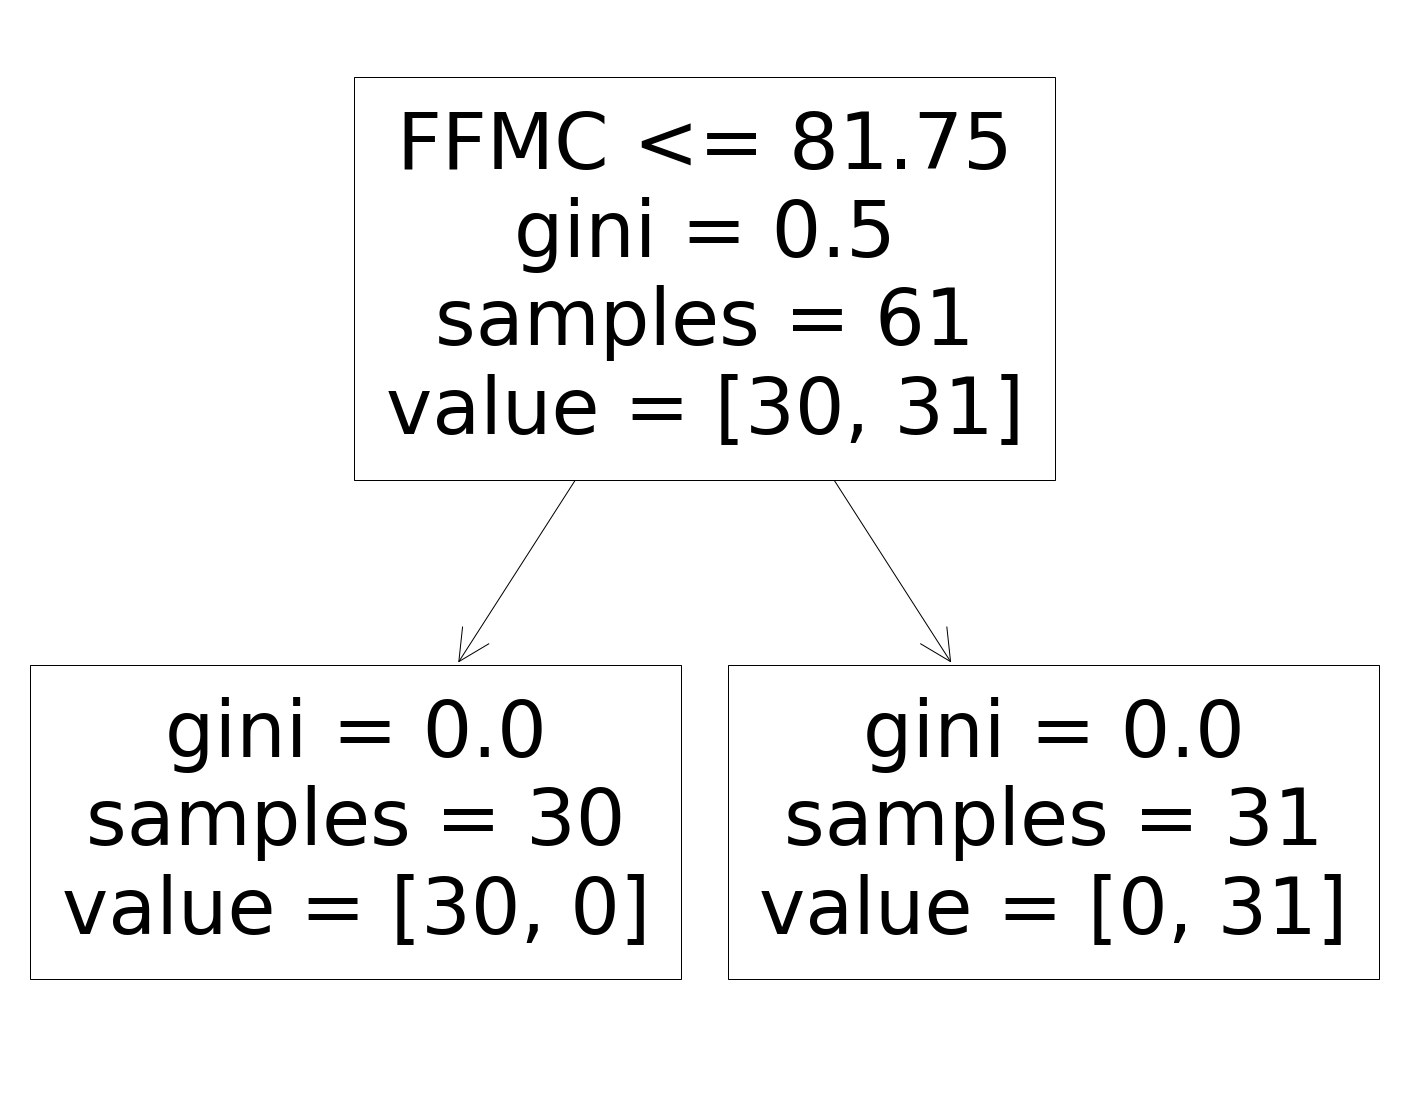

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=X_bt.columns)

fig.show()

In [ ]:
index_df = pd.DataFrame(index=X.index)
pred_df=pd.DataFrame(pred,index=X_bt.index,columns=['label_new']).astype(int)
pred_df=pd.concat([index_df,pred_df],axis=1)
pred_df.head()

,label_new
0,0.0
1,0.0
2,0.0
3,NaN
4,0.0


In [ ]:
pred_df['label_new']=pred_df['label_new'].apply(lambda x: n if pd.isna(x) else [int(x)])
pred_df.head()

,label_new
0,[0]
1,[0]
2,[0]
3,[]
4,[0]


In [ ]:
df=pd.concat([df,pred_df],axis=1)
df.head()

,label_old,label_new
0,[],[0]
1,[],[0]
2,[],[0]
3,[],[]
4,[],[0]


In [ ]:
df['label_old'] = df[['label_old','label_new']].values.tolist()
df=df.drop(columns=['label_new'])
df.to_csv('labels.csv')
df.head()

,label_old
0,"[[], [0]]"
1,"[[], [0]]"
2,"[[], [0]]"
3,"[[], []]"
4,"[[], [0]]"


4-значная конъюнкция

In [ ]:
# def conj(labels):
#   a = labels[0]
#   b = labels[1]
#   if a==b:
#     return a
#   elif a==f or b==f:
#     return f
#   elif a== t:
#     return b
#   elif b==t:
#     return a
#   else:
#     return f

# df['label_old']=df['label_old'].apply(conj)
# df.to_csv('labels.csv')
# df.head()

4-значная дизъюнкция

In [ ]:
def disj(labels):
  a=labels[0]
  b= labels[1]
  if a==b:
    return a
  elif a==t or b==t:
    return t
  elif a==f:
    return b
  elif b==f:
    return a
  else:
    return t

df['label_old']=df['label_old'].apply(disj)
df.to_csv('labels.csv')
df.head()

,label_old
0,[]
1,[]
2,[]
3,[]
4,[]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score

pred = [x[0] if len(x)==1 else -1 for x in df['label_old'].values]
acc_pred=accuracy_score(y,pred)

pred=[x if x==1 else 0 for x in pred]
prec_pred=precision_score(y,pred)

pred = [x if x == 1 else 0 for x in pred]
f1_pred=f1_score(y, pred)

print(f"Iteration {i}")
print(f"accuracy {acc_pred}")
print(f"precision {prec_pred}")
print(f"f1 score {f1_pred}")

Iteration 6
accuracy 0.48360655737704916
precision 1.0
f1 score 1.0
